# Logistic Regression as a Neural Network 
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [3]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initializing parameters



In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [6]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    # print(m)
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [7]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [8]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [10]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [11]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [12]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [13]:
data = pd.read_csv('./bioresponse.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(3751, 1777)

In [15]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.25, random_state=42)
train_set_x = np.asarray(train_set_x).T
test_set_x = np.asarray(test_set_x).T
train_set_y = np.asarray(train_set_y).T
test_set_y = np.asarray(test_set_y).T

In [57]:
train_set_x.shape

(1776, 2813)

In [72]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 600, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.773524
Cost after iteration 200: 0.655340
Cost after iteration 300: 0.646595
Cost after iteration 400: 0.703022
Cost after iteration 500: 0.686832
train accuracy: 62.92214717383576 %
test accuracy: 65.56503198294243 %


### SGD

In [43]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    # print(m)
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [51]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        rand = np.random.randint(0, X.shape[1] - 10)
        X_sample = X[:, rand:rand + 10]
        Y_sample = Y[rand:rand + 10]
        grads, cost = propagate(w,b,X_sample,Y_sample)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [52]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [61]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 10_000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # print(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [73]:
SGD_d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 600, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.689899
Cost after iteration 200: 0.704030
Cost after iteration 300: 0.678298
Cost after iteration 400: 0.660411
Cost after iteration 500: 0.678500
train accuracy: 67.40135087095626 %
test accuracy: 70.1492537313433 %


Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/


train accuracy: 63.27763953075009 %
test accuracy: 66.63113006396588 %
train accuracy: 64.41521507287592 %
test accuracy: 68.33688699360341 %


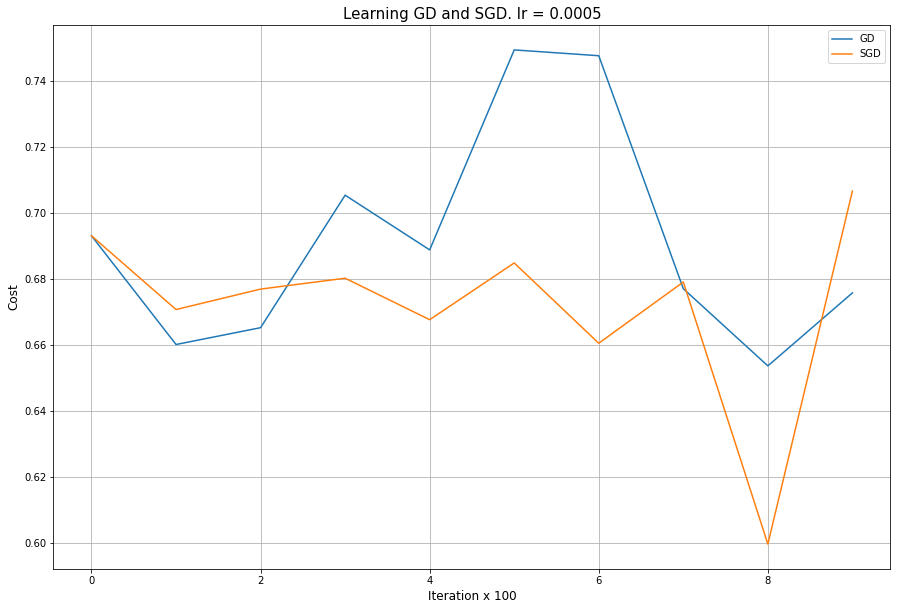

In [87]:
d_0_0005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.0005, print_cost = False)
SGD_d_0_0005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.0005, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d_0_0005['costs'], label="GD")
plt.plot(SGD_d_0_0005['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.0005', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

train accuracy: 66.15712762175613 %
test accuracy: 68.44349680170575 %
train accuracy: 69.99644507643086 %
test accuracy: 70.8955223880597 %


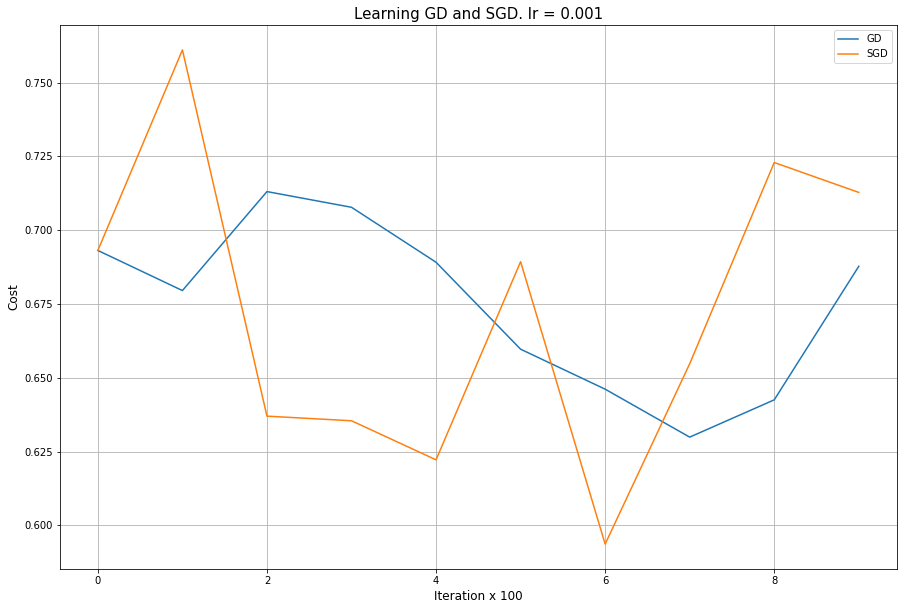

In [86]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.001, print_cost = False)
SGD_d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.001, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d['costs'], label="GD")
plt.plot(SGD_d['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.001', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

train accuracy: 74.58229648062567 %
test accuracy: 74.84008528784648 %
train accuracy: 74.76004265908283 %
test accuracy: 73.2409381663113 %


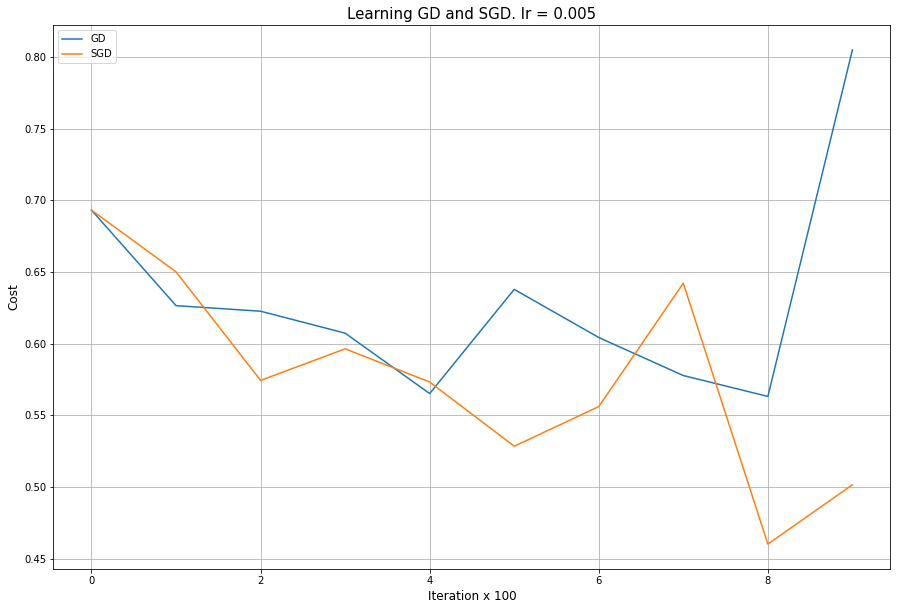

In [85]:
d_0_005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.005, print_cost = False)
SGD_d_0_005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.005, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d_0_005['costs'], label="GD")
plt.plot(SGD_d_0_005['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.005', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

train accuracy: 76.60860291503732 %
test accuracy: 74.09381663113007 %
train accuracy: 76.50195520796302 %
test accuracy: 73.98720682302772 %


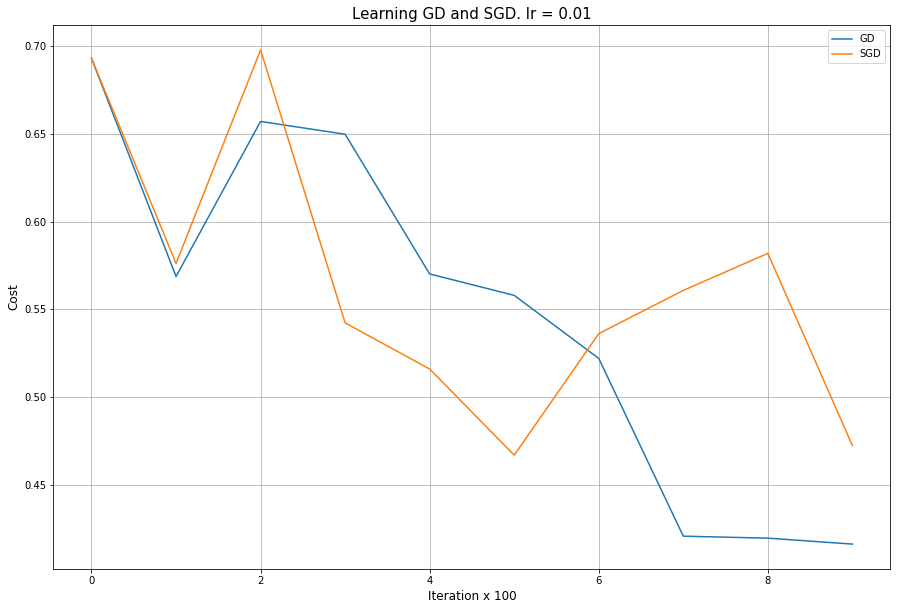

In [84]:
d_0_01 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.01, print_cost = False)
SGD_d_0_01 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.01, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d_0_01['costs'], label="GD")
plt.plot(SGD_d_0_01['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.01', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

train accuracy: 79.77248489157483 %
test accuracy: 75.69296375266525 %
train accuracy: 79.91468183434057 %
test accuracy: 76.22601279317698 %


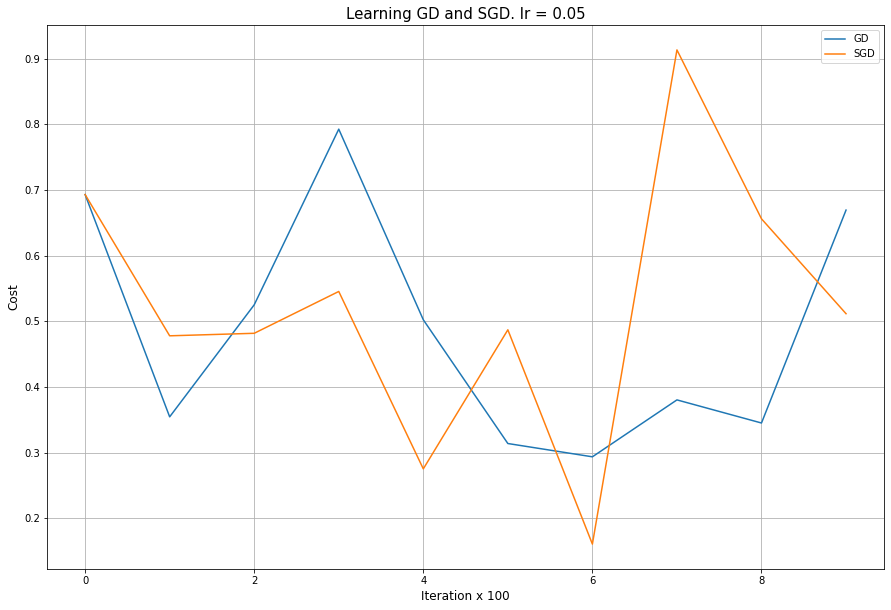

In [88]:
d_0_05 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.05, print_cost = False)
SGD_d_0_05 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.05, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d_0_05['costs'], label="GD")
plt.plot(SGD_d_0_05['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.05', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

train accuracy: 80.69676501955209 %
test accuracy: 77.07889125799574 %
train accuracy: 73.65801635264842 %
test accuracy: 73.45415778251599 %


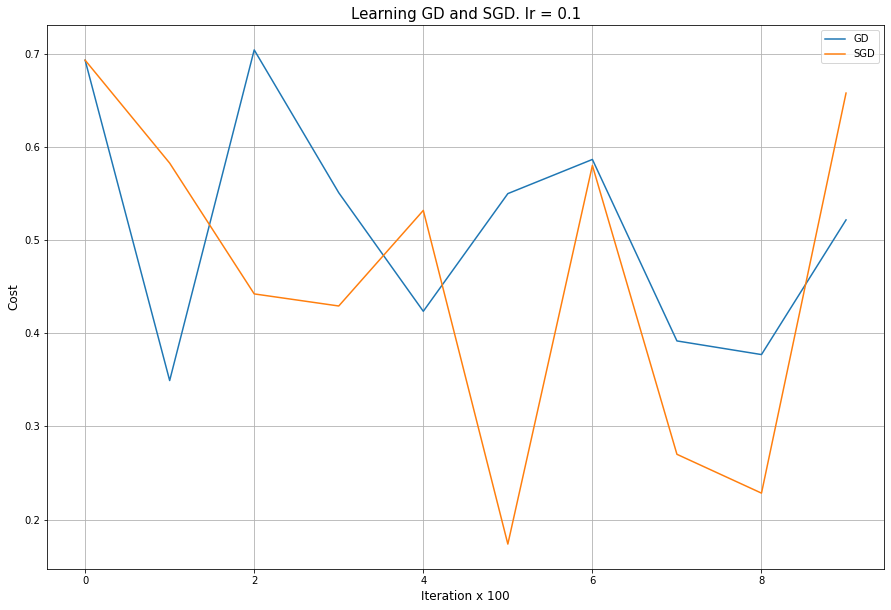

In [91]:
d_0_1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.1, print_cost = False)
SGD_d_0_1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.1, print_cost = False)
plt.figure(figsize=(15, 10))
plt.plot(d_0_1['costs'], label="GD")
plt.plot(SGD_d_0_1['costs'], label="SGD")
plt.title('Learning GD and SGD. lr = 0.1', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

### From the obtained result we see that learning rate influence on the speed of learning model. The best accuracy in GD we obtained on lr=0.1 (highest value of the lr). For SGD the best accuracy is on lr=0.05 (the second highest result)

In [94]:
class Adam:
    """Adam - Adaptive Moment Estimation
    Parameters:
    -----------
    learning_rate: float = 0.001
        The step length used when following the negative gradient.
    beta_1: float = 0.9
        The exponential decay rate for the 1st moment estimates.
    beta_2: float = 0.999
        The exponential decay rate for the 2nd moment estimates.
    epsilon: float = 1e-07
        A small floating point value to avoid zero denominator.
    """
    def __init__(self, learning_rate: float = 0.001, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-7) -> None:
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

        self.t = 0
        self.m = None  # Decaying averages of past gradients
        self.v = None  # Decaying averages of past squared gradients

    def update(self, w: np.ndarray, grad_wrt_w: np.ndarray) -> np.ndarray:
        self.t += 1
        if self.m is None:
            self.m = np.zeros(np.shape(grad_wrt_w))
            self.v = np.zeros(np.shape(grad_wrt_w))

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * grad_wrt_w
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * np.power(grad_wrt_w, 2)

        m_hat = self.m / (1 - self.beta_1**self.t)
        v_hat = self.v / (1 - self.beta_2**self.t)

        w_update = self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        return w - w_update

In [101]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        # rand = np.random.randint(0, X.shape[1] - 10)
        # X_sample = X[:, rand:rand + 10]
        # Y_sample = Y[rand:rand + 10]
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        adam = Adam()
        w = adam.update(w, dw)
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [102]:
Adam_d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1_000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.495699
Cost after iteration 200: 0.451591
Cost after iteration 300: 0.427601
Cost after iteration 400: 0.410701
Cost after iteration 500: 0.398329
Cost after iteration 600: 0.388227
Cost after iteration 700: 0.379916
Cost after iteration 800: 0.373369
Cost after iteration 900: 0.368101
train accuracy: 84.32278706007821 %
test accuracy: 77.18550106609808 %


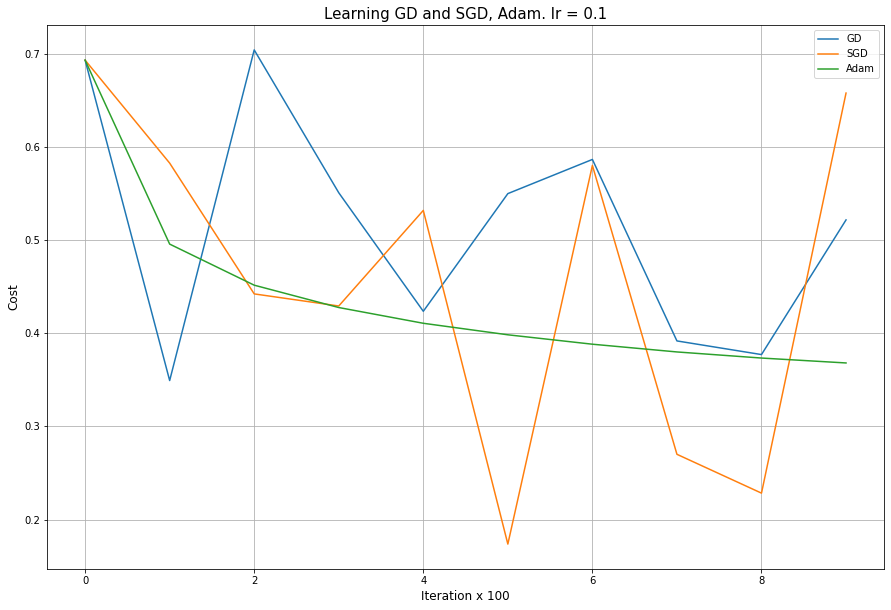

In [103]:
plt.figure(figsize=(15, 10))
plt.plot(d_0_1['costs'], label="GD")
plt.plot(SGD_d_0_1['costs'], label="SGD")
plt.plot(Adam_d['costs'], label="Adam")
plt.title('Learning GD and SGD, Adam. lr = 0.1', fontsize=15)
plt.xlabel('Iteration x 100', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)

# We can see that Adam's algorithm converge to minimum better and smoothly than others.